In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:
data.shape #no of rows and columns we have in data set

(1338, 7)

In [5]:
data.isna().sum() # how many null values in every coumn

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.nunique() #how many unique values each have

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<AxesSubplot: >

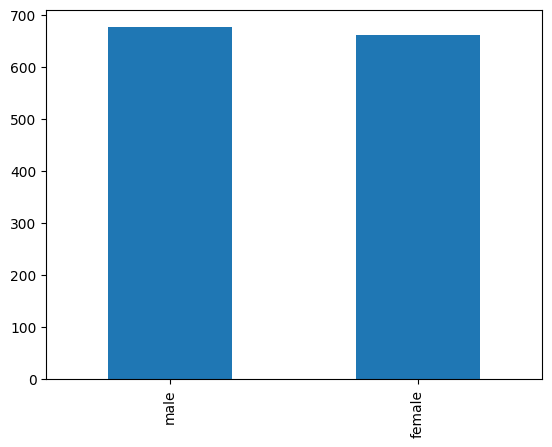

In [7]:
data.sex.value_counts().plot(kind='bar')

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
#del data['smoker']

In [12]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='charges'>

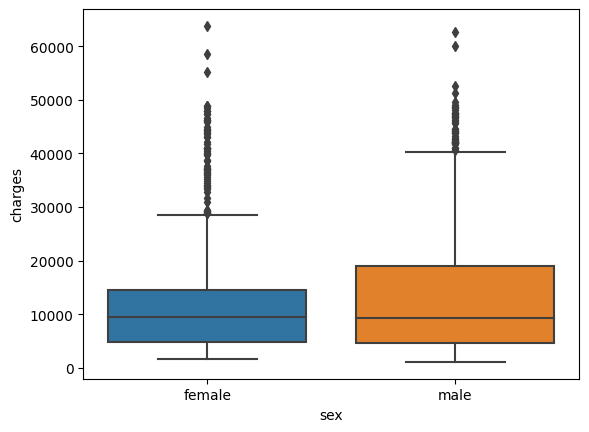

In [14]:
sns.boxplot(x=data['sex'], y=data['charges'])


<AxesSubplot: xlabel='age', ylabel='charges'>

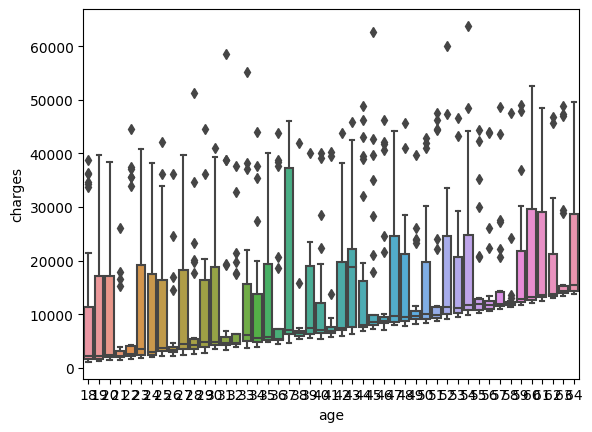

In [15]:
sns.boxplot(x=data['age'],y=data['charges'])


<AxesSubplot: xlabel='children', ylabel='charges'>

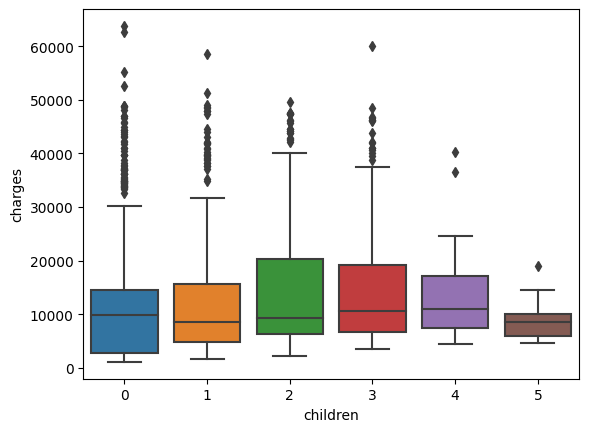

In [16]:
sns.boxplot(x=data['children'],y=data['charges'])


<AxesSubplot: xlabel='region', ylabel='charges'>

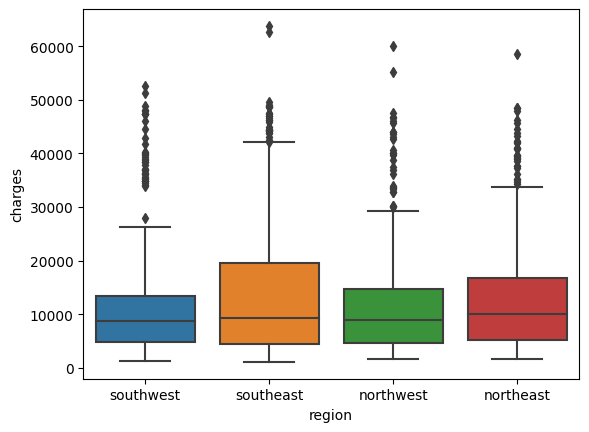

In [17]:
sns.boxplot(x=data['region'],y=data['charges'])


<AxesSubplot: >

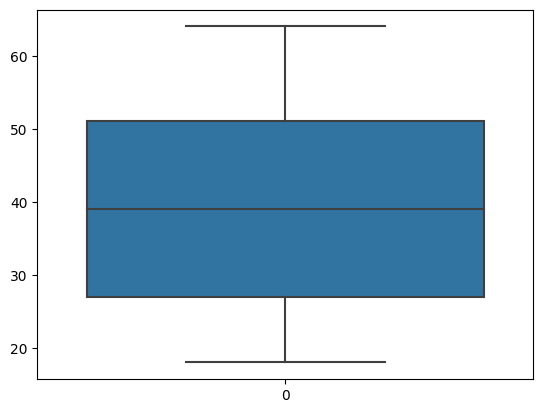

In [18]:
sns.boxplot(data=data.iloc[:,0])

<AxesSubplot: >

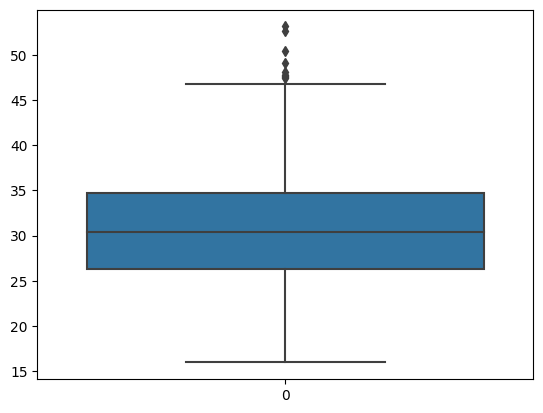

In [19]:
sns.boxplot(data=data.iloc[:,2])

<AxesSubplot: >

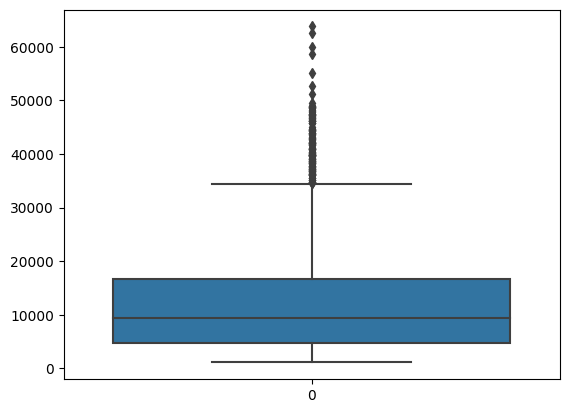

In [20]:
sns.boxplot(data['charges'])

In [21]:
data.bmi.max()

53.13

In [22]:
data.bmi.min()

15.96

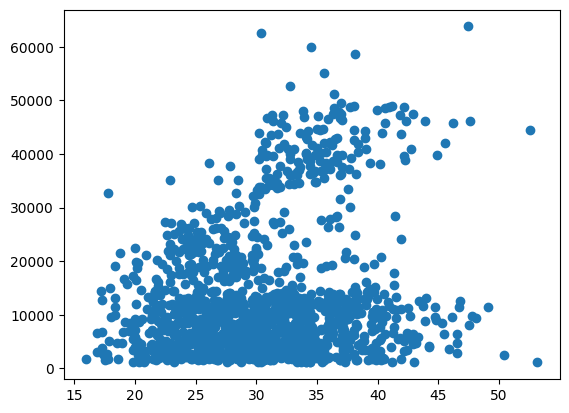

In [23]:
plt.scatter(data['bmi'],data['charges'])

In [24]:
#sns.boxplot(data['bmi'],data['charges'])

In [25]:
#data=data[data['bmi']<45]
#data=data[data['charges']<30000]

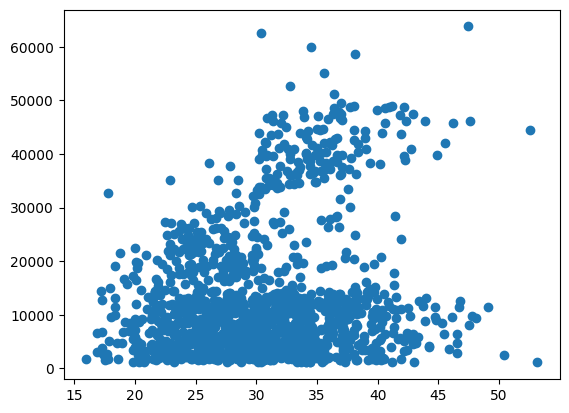

In [26]:
plt.scatter(data['bmi'],data['charges'])

In [27]:
hm=data.corr().round(2)

C:\Users\Ahamed Minhaj\AppData\Local\Temp\ipykernel_2464\2680526498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm=data.corr().round(2)


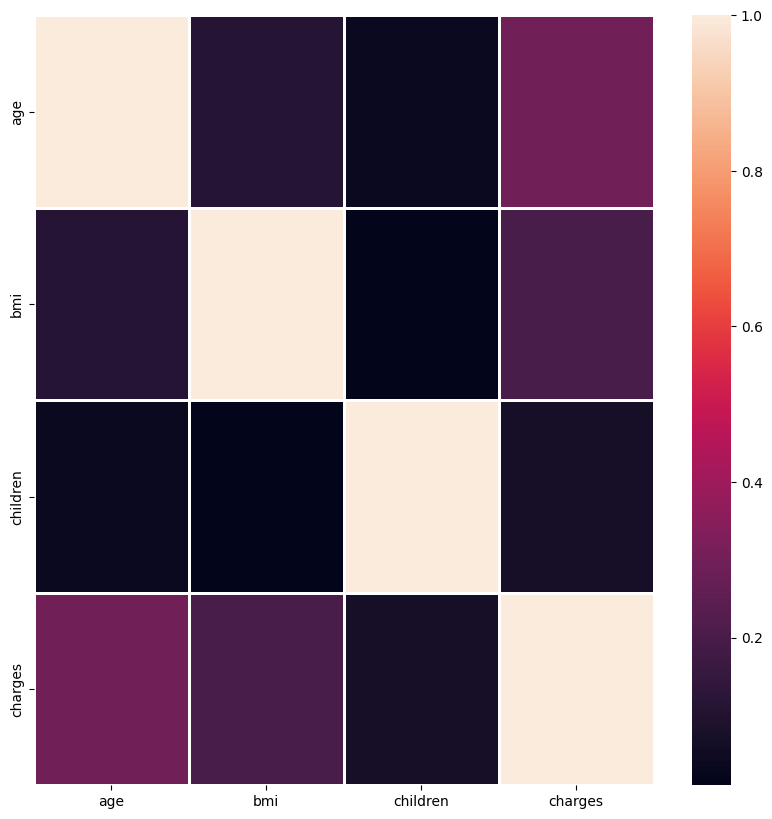

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(hm,linewidth=1)

In [29]:
#del data['children']

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')

In [34]:
X=ct1.fit_transform(X)

In [35]:
X

array([[1.0, 0.0, 0.0, ..., 19, 27.9, 0],
       [0.0, 1.0, 1.0, ..., 18, 33.77, 1],
       [0.0, 1.0, 1.0, ..., 28, 33.0, 3],
       ...,
       [1.0, 0.0, 1.0, ..., 18, 36.85, 0],
       [1.0, 0.0, 1.0, ..., 21, 25.8, 0],
       [1.0, 0.0, 0.0, ..., 61, 29.07, 0]], dtype=object)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
y_pred=regressor.predict(X_test)

In [40]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6282.235    6664.68595]
 [11455.28    11837.16   ]
 [ 4827.90495  4661.28635]
 [ 5976.8311   6373.55735]
 [ 6600.361    6986.697  ]
 [ 1720.3537   1719.4363 ]
 [11093.6229  11090.7178 ]
 [35147.52848 22331.5668 ]
 [21082.16    19719.6947 ]
 [24869.8368  24106.91255]
 [ 3021.80915  2632.992  ]
 [10264.4421   8703.456  ]
 [26125.67477 16577.7795 ]
 [11944.59435 11356.6609 ]
 [ 8527.532    9432.9253 ]
 [47896.79135 48517.56315]
 [11534.87265 11931.12525]
 [ 5469.0066   5227.98875]
 [27218.43725 30184.9367 ]
 [ 1261.859   23082.95533]
 [20277.80751  5148.5526 ]
 [38282.7495  39871.7043 ]
 [11944.59435 11743.9341 ]
 [ 6571.544    7537.1639 ]
 [ 1832.094    1964.78   ]
 [13555.0049  13844.7972 ]
 [11946.6259  11945.1327 ]
 [ 6781.3542   6775.961  ]
 [12928.7911  36910.60803]
 [ 5934.3798   7243.8136 ]
 [ 5469.0066   4992.3764 ]
 [ 1253.936    1256.299  ]
 [34617.84065 33732.6867 ]
 [18218.16139  4189.1131 ]
 [ 6875.961    7256.7231 ]
 [ 1253.936    1252.407  ]
 [11163.568   11264.541  ]
 

In [41]:
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score

In [42]:
print(r2_score(y_test,y_pred))

0.6932219114838865


In [43]:
import math
print(math.sqrt(mean_squared_error(y_test,y_pred))) # Mean square error
print(explained_variance_score(y_test,y_pred)) # Varience

6289.7435754051785
0.6940154150959286


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(regressor, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

In [45]:
print('r2: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

r2: 0.592 (0.226)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classification model and fit it to the training data
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy}')


ValueError: Unknown label type: 'continuous'

Remember, for regression tasks like predicting numeric values (e.g., house prices), accuracy is not a suitable metric, and you should use regression metrics like MSE or MAE.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regression model and fit it to the training data
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) as an example of regression evaluation
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 37857552.91479228


In [56]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is named 'data'
le = LabelEncoder()

# sex is the column you want to encode
data['sex_encoded'] = le.fit_transform(data['sex'])

# Display the encoded values
print(data[['sex', 'sex_encoded']].head())


      sex  sex_encoded
0  female            0
1    male            1
2    male            1
3    male            1
4    male            1
